#Single Linear Regression

##Case 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
#salary

In [ ]:
data.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [ ]:
datas = pd.DataFrame(data)
datas.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


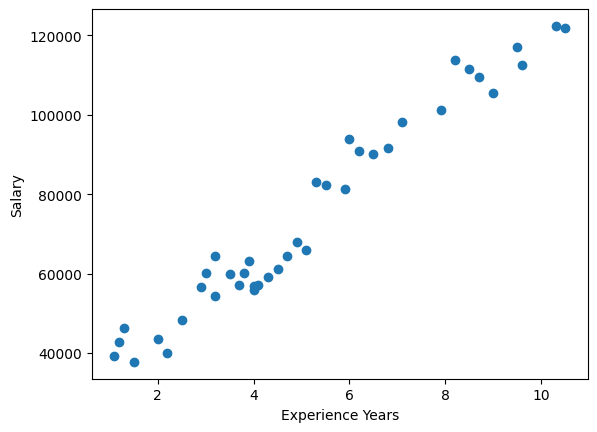

In [ ]:
plt.scatter(data['Experience Years'], data['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

In [ ]:
#define target (y) and feature (x)
y = data['Salary']
X = data['Experience Years']

In [ ]:
#test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=200)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28,), (12,), (28,), (12,))

In [ ]:
X_train_flatten = X_train.to_numpy().reshape(-1,1)
y_train_flatten = y_train.to_numpy().reshape(-1,1)
X_test_flatten = X_test.to_numpy().reshape(-1,1)
y_test_flatten = y_test.to_numpy().reshape(-1,1)

In [ ]:
X_train_flatten.shape, X_test_flatten.shape, y_train_flatten.shape, y_test_flatten.shape

((28, 1), (12, 1), (28, 1), (12, 1))

In [ ]:
#Choose model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#Fit the data into the model
model = lr.fit(X_train_flatten, y_train_flatten)
model
model.intercept_
model.coef_

array([[9684.80625624]])

In [1]:
!pip install kaggle opendatasets

##Case 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
data1 = pd.read_csv(url)
df =  pd.DataFrame(data1)
df.head()
df.sample(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
904,2014,PORSCHE,PANAMERA 4S EXECUTIVE,FULL-SIZE,3.0,6,AM7,Z,13.7,8.9,11.5,25,264
119,2014,BMW,M5,MID-SIZE,4.4,8,M6,Z,16.2,10.9,13.8,20,317
273,2014,CHEVROLET,TRAX AWD,SUV - SMALL,1.4,4,AS6,X,10.0,7.8,9.0,31,207
264,2014,CHEVROLET,SUBURBAN 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
248,2014,CHEVROLET,SONIC,COMPACT,1.4,4,M6,X,8.5,6.2,7.5,38,173
857,2014,NISSAN,SENTRA,MID-SIZE,1.8,4,AV,X,7.8,6.0,7.0,40,161
949,2014,SUBARU,IMPREZA AWD,COMPACT,2.5,4,M5,Z,12.6,9.5,11.2,25,258
679,2014,LINCOLN,MKT AWD,SUV - STANDARD,3.5,6,AS6,X,14.8,10.4,12.8,22,294
361,2014,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,X,18.2,13.3,16.0,18,368


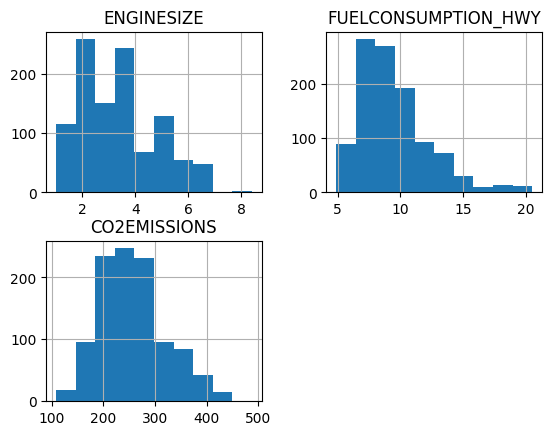

In [ ]:
cdf = df[['ENGINESIZE', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
vis = cdf[['ENGINESIZE', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
vis.hist()
plt.show()

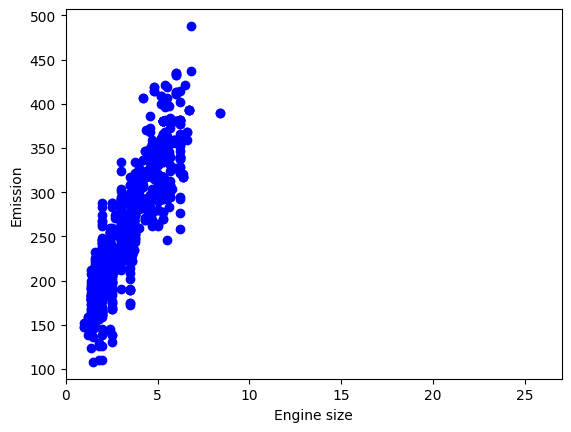

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [ ]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.33)

In [ ]:
print(X_test1.shape, y_test1.shape, X_train1.shape, y_train1.shape)

(353,) (353,) (714,) (714,)


In [ ]:
#Reshaping
X_test1 = X_test1.reshape(-1,1)
X_train1 = X_train1.reshape(-1,1)

In [ ]:
lr = LinearRegression()
regressor = lr.fit(X_train1, y_train1)

print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  39.57081212386111
Intercept:  123.20765475724289


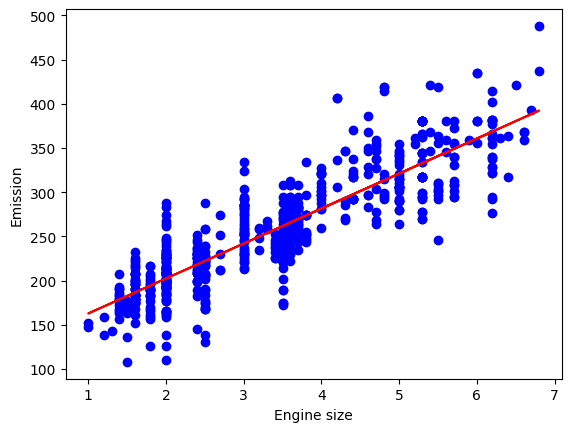

In [ ]:
plt.scatter(X_train1, y_train1, color = 'blue')
plt.plot(X_train1, regressor.coef_[0]*X_train1 + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Prediction** is consist of coef * X + intercept

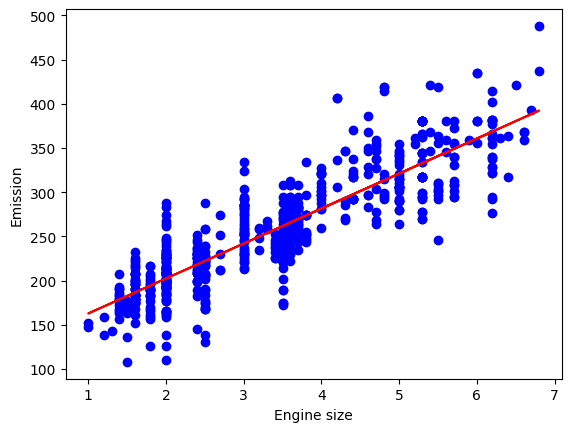

In [ ]:
plt.scatter(X_train1, y_train1, color = 'blue')
plt.plot(X_train1, regressor.predict(X_train1), '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
y_test1 = regressor.predict(X_test1)
print(mean_absolute_error(y_test1, y_test1))

0.0


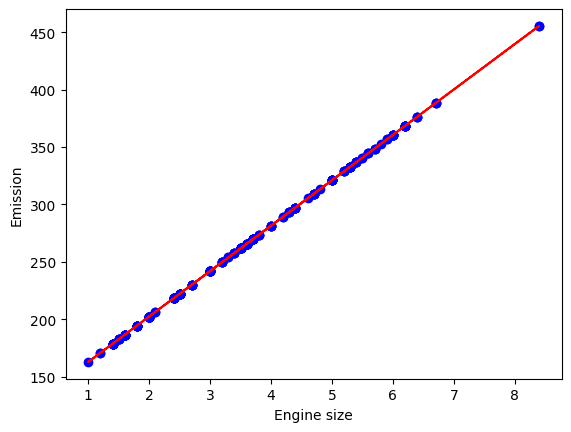

In [ ]:
plt.scatter(X_test1, y_test1, color = 'blue')
plt.plot(X_test1, regressor.predict(X_test1), '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#Multiple Linear Regression

In [39]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [40]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [44]:
df = pd.read_csv(url)
df.head()
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
878,2014,PORSCHE,911 CARRERA S,MINICOMPACT,3.8,6,M7,Z,12.6,8.6,10.8,26,248
502,2014,HYUNDAI,ACCENT,COMPACT,1.6,4,A6,X,8.8,6.3,7.7,37,177
484,2014,HONDA,ACCORD,MID-SIZE,3.5,6,A6,X,11.0,6.8,9.1,31,209
944,2014,SUBARU,FORESTER AWD,SUV - SMALL,2.0,4,AV,Z,10.2,8.6,9.5,30,218
1020,2014,VOLKSWAGEN,BEETLE CONVERTIBLE,SUBCOMPACT,1.8,4,A6,X,9.8,7.3,8.7,32,200


In [45]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',], axis=1)

In [6]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [46]:
df = df.drop(['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis = 1)
df.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
164,2.0,4,28,232
325,3.6,6,18,250
854,3.5,6,25,255
957,3.6,6,24,267
731,6.2,8,18,352
104,4.4,8,22,292
258,1.4,4,36,182
1057,2.5,5,28,232
471,5.3,8,20,317


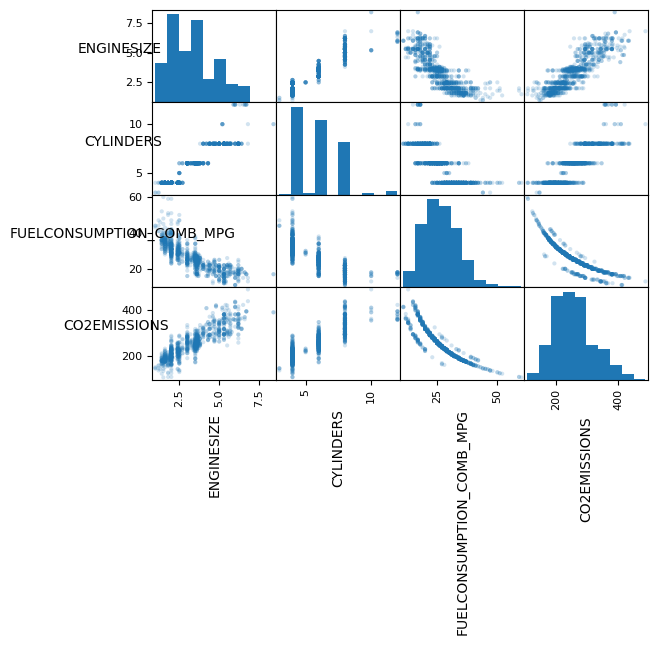

<Figure size 1200x600 with 0 Axes>

In [47]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.figure(figsize=(12,6))
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [48]:
X = df.iloc[:,[0,1]]
y = df.iloc[:,[2]]

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [50]:
df = pd.DataFrame(X).describe().round(2)
df

,ENGINESIZE,CYLINDERS
count,1067.00,1067.00
mean,3.35,5.79
std,1.42,1.80
min,1.00,3.00
25%,2.00,4.00
50%,3.40,6.00
75%,4.30,8.00
max,8.40,12.00


In [51]:
df_std = pd.DataFrame(X_std).describe().round(2)
df_std

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-1.56
25%,-0.95,-1.00
50%,0.04,0.11
75%,0.67,1.23
max,3.57,3.45


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
multi_lr1 = lr.fit(X_train, y_train)

In [116]:
coef_ = multi_lr1.coef_
intercept_ = multi_lr1.intercept_
print(f"coefficient: {multi_lr1.coef_}")
print(f"intercept: {multi_lr1.intercept_}")

coefficient: [[-4.28705153e-03  5.51386823e-04 -8.80171331e-04 -1.12956287e-04
   3.17639680e-02 -7.68170845e-03  1.37182423e-01 -1.89852776e-01
   9.44517154e-02]]
intercept: [0.50537068]


In [117]:
X_test

,tenure,age,address,income,ed,employ,equip,callcard,wireless
58,32.0,27.0,3.0,91.0,4.0,1.0,1.0,1.0,1.0
40,21.0,29.0,7.0,40.0,4.0,2.0,1.0,1.0,1.0
34,18.0,69.0,11.0,58.0,3.0,8.0,1.0,1.0,1.0
102,34.0,63.0,10.0,23.0,2.0,0.0,1.0,1.0,1.0
184,26.0,55.0,13.0,61.0,1.0,26.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
67,61.0,45.0,21.0,80.0,2.0,13.0,0.0,1.0,0.0
78,69.0,46.0,18.0,66.0,2.0,19.0,0.0,1.0,0.0
42,50.0,52.0,17.0,36.0,4.0,16.0,0.0,1.0,1.0
17,52.0,61.0,3.0,53.0,5.0,1.0,1.0,1.0,1.0


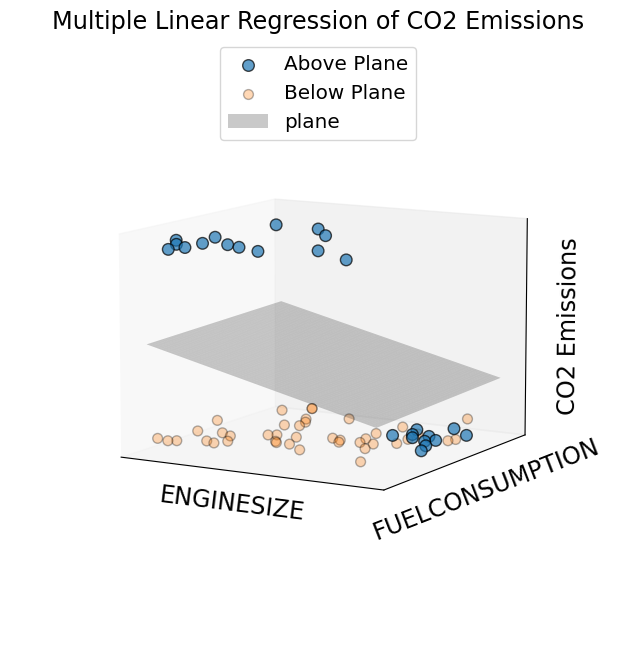

<Figure size 1200x600 with 0 Axes>

In [118]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
# Use .iloc for indexing the DataFrame
X1 = X_test.iloc[:, 0].values if X_test.ndim > 1 else X_test.values # Access the first column's values using .iloc and .values
X2 = X_test.iloc[:, 1].values if X_test.ndim > 1 else np.zeros_like(X1) # Access the second column's values using .iloc and .values


# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ + coef_[0, 0] * x1_surf + coef_[0, 1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = multi_lr1.predict(X_test)  # Pass the DataFrame directly to predict

# Compare the target variable (y_test) to predictions
above_plane = y_test.values.ravel() >= y_pred.ravel()  # Convert to 1D arrays for comparison
below_plane = y_test.values.ravel() < y_pred.ravel()  # Convert to 1D arrays for comparison

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test.values.ravel()[above_plane], label="Above Plane", s=70, alpha=.7, ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test.values.ravel()[below_plane], label="Below Plane", s=50, alpha=.3, ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21, label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

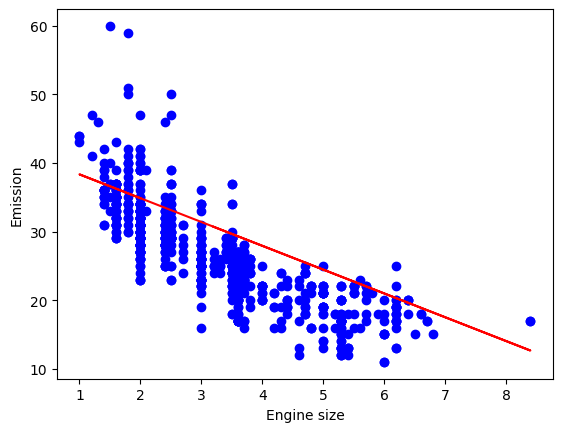

In [86]:
plt.scatter(X_train.iloc[:,0], y_train,  color='blue')
plt.plot(X_train.iloc[:,0], coef_[0,0] * X_train.iloc[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

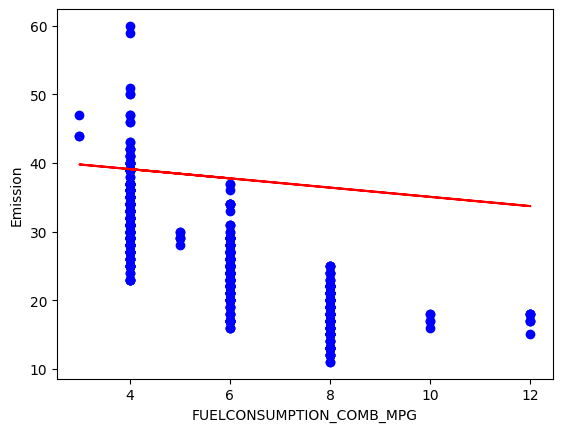

In [87]:
plt.scatter(X_train.iloc[:,1], y_train,  color='blue')
plt.plot(X_train.iloc[:,1], coef_[0,1] * X_train.iloc[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

#Logistic Regression

In [89]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data)
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [98]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype(int)
churn_df.sample(7)

<ipython-input-98-aedd8fd06ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype(int)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
149,19.0,35.0,7.0,58.0,3.0,5.0,1.0,1.0,1.0,1
188,25.0,38.0,19.0,56.0,1.0,19.0,1.0,1.0,1.0,0
34,18.0,69.0,11.0,58.0,3.0,8.0,1.0,1.0,1.0,0
139,17.0,41.0,9.0,28.0,4.0,3.0,0.0,1.0,0.0,0
97,25.0,62.0,27.0,28.0,4.0,33.0,1.0,1.0,1.0,1
31,64.0,55.0,28.0,104.0,1.0,26.0,0.0,1.0,0.0,0
176,18.0,69.0,28.0,11.0,1.0,17.0,0.0,0.0,0.0,0


In [101]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
y = churn_df[['churn']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model_logreg = logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
yhat = model_logreg.predict(X_test)
yhat[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [111]:
yhat_prob = model_logreg.predict_proba(X_test)
df = pd.DataFrame(yhat_prob[:10]).describe()
yhat_prob[:10]

array([[0.4123526 , 0.5876474 ],
       [0.36726661, 0.63273339],
       [0.4389437 , 0.5610563 ],
       [0.47169494, 0.52830506],
       [0.94755756, 0.05244244],
       [0.57165667, 0.42834333],
       [0.24152142, 0.75847858],
       [0.82829708, 0.17170292],
       [0.45906697, 0.54093303],
       [0.87252039, 0.12747961]])

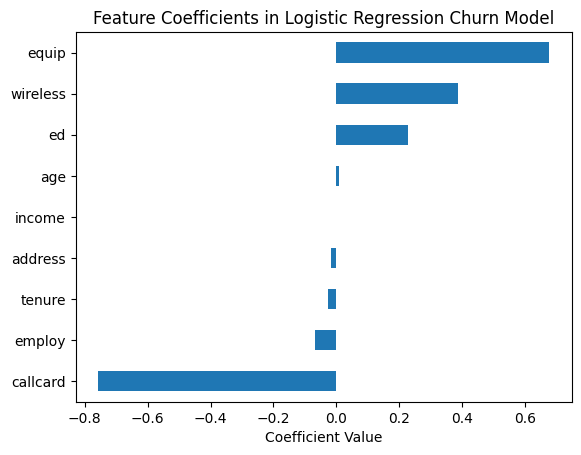

In [113]:
coefficients = pd.Series(model_logreg.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()